In [1]:
#IMPORTING PACKAGES
import numpy as np
import matplotlib.pyplot as plt

In [2]:
######################################### FUNCTION 1 ##########################################
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (x1-3)**2 + (x2 -1)**2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([2*(x1-3), 2*(x2-1)])

True solution: [3,1]
 
With backtracking:
computed solution: [2.99999378 0.99999793]
number of iterations 97
Alpha value = {0.0625}
 
Without backtracking
number of iterations 99
computed solution: [2.60214133 0.86738044]
number of iterations 99
computed solution: [2.99992032 0.99997344]
number of iterations 60
computed solution: [2.99999632 0.99999877]
number of iterations 27
computed solution: [2.99999816 0.99999939]


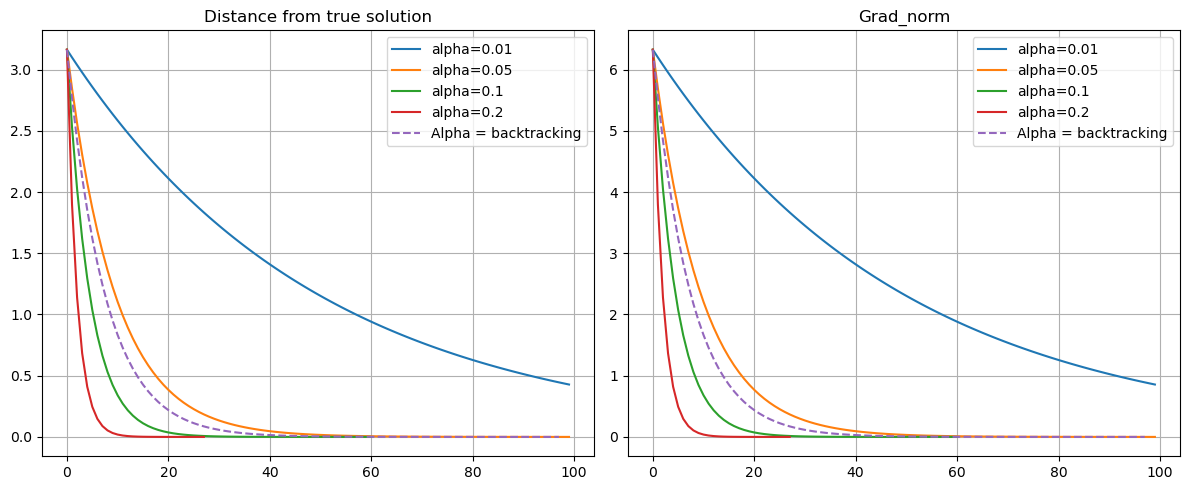

In [3]:
#Backtracking function
def backtracking(f, grad_f, x):
    alpha = 1
    c = 0.8
    tau = 0.25
    if type(grad_f(x)) != int and type(grad_f(x)) != float:
        while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
            alpha = tau * alpha
        return alpha
    else:
        while f(x - alpha * grad_f(x)) > f(x) - c * alpha * grad_f(x)**2:
            alpha = tau * alpha
        return alpha
        
#Gradien Descent function
def GD(f, grad_f, x0, alpha, x_true, kmax = 100, tolf= 1e-6, tolx= 1e-6, backtrack = False):
    if type(x0) != int and type(x0) != float:
        grad_norm = np.zeros((kmax+1, ))
        grad_norm[0] = np.linalg.norm(grad_f(x0))
        diff = np.zeros((kmax+1,))
        diff[0] = np.linalg.norm(x_true-x0,2)
    else:
        grad_norm = [0]
        grad_norm.append(grad_f(x0)**2)
        diff = [0]
        diff.append((x_true-x0)**2)
    
       
    alphavalues = []
    for k in range(kmax):
        if backtrack == True:
            alpha = backtracking(f, grad_f, x0)
            alphavalues.append(alpha)
        x = x0 - alpha * grad_f(x0)
        
        if type(x0) != int and type(x0) != float:
            grad_norm[k+1] = np.linalg.norm(grad_f(x))
        else:
            grad_norm.append(grad_f(x)**2)
        
        if type(x0) != int and type(x0) != float:
            if np.linalg.norm(grad_f(x)) <= tolf * grad_norm[0] or np.linalg.norm(x-x0)<= tolx:
                break
        else:
            if grad_f(x)**2 <= tolf * grad_norm[0] or (x-x0)**2<= tolx:
                break
        
        x0 = x
        if type(x0) != int and type(x0) != float:
            diff[k+1] = np.linalg.norm(x_true-x0,2)
        else:
            diff.append((x_true-x0)**2)
    #cut off the exceeding values
    diff = diff[:k+1]
    grad_norm = grad_norm[:k+1]
    
    return x, k, diff, grad_norm, alphavalues


x0 = np.zeros([2, ])
alpha = [0.01,0.05,0.10,0.20]

fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

x_back, k_back, diff_back, grad_norm_back, alphavalues = GD(f, grad_f, x0, alpha, backtrack=True, x_true = [3,1])
print("True solution: [3,1]")
print(" ")
print("With backtracking:")
print(f"computed solution: {x_back}")
print(f"number of iterations {k_back}")
print(f"Alpha value = {set(alphavalues)}")
print(" ")
print("Without backtracking")

axes[0].set_title("Distance from true solution")
for i in alpha:
    x_sol, k, diff, grad_norm, alphavalues = GD(f, grad_f, x0, alpha=i, backtrack=False, x_true = [3,1])
    print(f"number of iterations {k}")
    print(f"computed solution: {x_sol}")
    axes[0].plot(diff, label=f"alpha={i}")

axes[0].plot(diff_back, label = "Alpha = backtracking", linestyle = "--")
axes[0].grid()
axes[0].legend()


axes[1].set_title("Grad_norm")
for i in alpha:
    x_sol, k, diff, grad_norm, alphavalues = GD(f, grad_f, x0, alpha=i, backtrack=False, x_true = [3,1])
    axes[1].plot(grad_norm, label=f"alpha={i}")

axes[1].plot(grad_norm_back, label = "Alpha = backtracking", linestyle = "--")
axes[1].grid()
axes[1].legend()


plt.tight_layout()
plt.show()

In [ ]:
######################################### FUNCTION 2 ##########################################

def f(x):
    x1 = x[0]
    x2 = x[1]
    return 10*(x1-1)**2 + (x2-2)**2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([20*(x1-1), 2*(x2-2)])

True solution: [1,2]
 
With backtracking:
computed solution: [1.         1.99999033]
number of iterations 96
Alpha value = {0.015625, 0.0625}
 
Without backtracking
number of iterations 99
computed solution: [1.         1.99994688]
number of iterations 80
computed solution: [1.         1.99999011]
number of iterations 62
computed solution: [1.00000016 1.99999133]
number of iterations 99
computed solution: [0.99997344 2.        ]


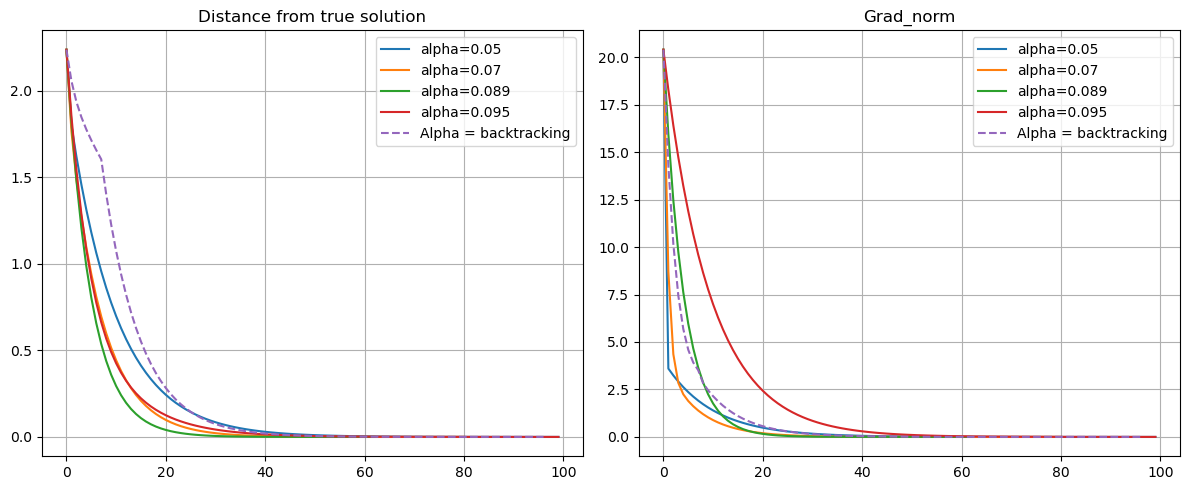

In [5]:

x0 = np.zeros([2, ])
#alpha = [0.01,0.05,0.10,0.20]
alpha = [0.05, 0.07, 0.089, 0.095]


fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

x_back, k_back, diff_back, grad_norm_back, alphavalues = GD(f, grad_f, x0, alpha, backtrack=True, x_true = [1,2])
print("True solution: [1,2]")
print(" ")
print("With backtracking:")
print(f"computed solution: {x_back}")
print(f"number of iterations {k_back}")
print(f"Alpha value = {set(alphavalues)}")
print(" ")
print("Without backtracking")

axes[0].set_title("Distance from true solution")
for i in alpha:
    x_sol, k, diff, grad_norm, alphavalues = GD(f, grad_f, x0, alpha=i, backtrack=False, x_true = [1,2])
    print(f"number of iterations {k}")
    print(f"computed solution: {x_sol}")
    axes[0].plot(diff, label=f"alpha={i}")

axes[0].plot(diff_back, label = "Alpha = backtracking", linestyle = "--")
axes[0].grid()
axes[0].legend()


axes[1].set_title("Grad_norm")
for i in alpha:
    x_sol, k, diff, grad_norm, alphavalues = GD(f, grad_f, x0, alpha=i, backtrack=False, x_true = [1,2])
    axes[1].plot(grad_norm, label=f"alpha={i}")

axes[1].plot(grad_norm_back, label = "Alpha = backtracking", linestyle = "--")
axes[1].grid()
axes[1].legend()


plt.tight_layout()
plt.show()

Condition number of Vandermonde matrix with n=5 : 686.4349418185968


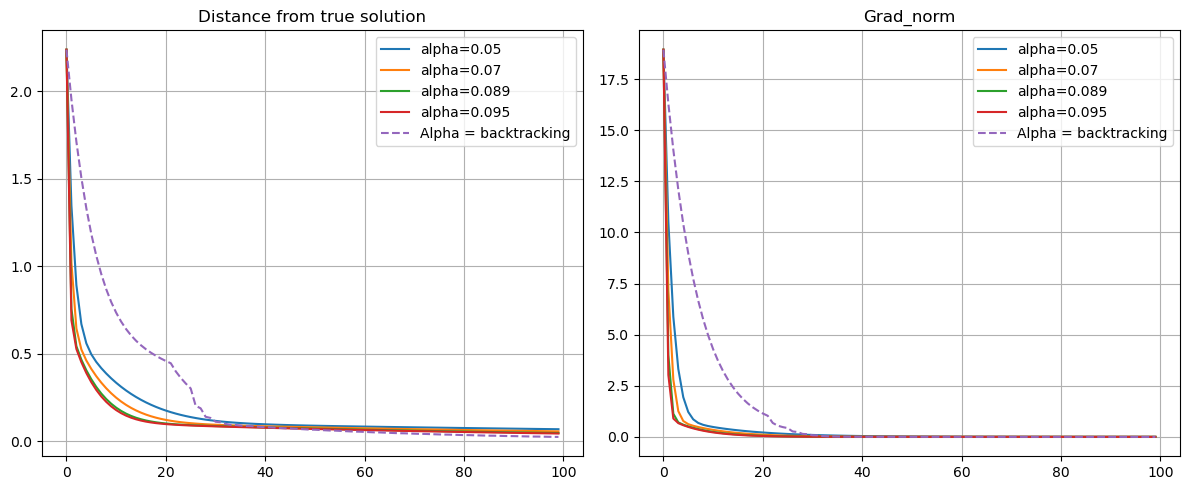

Condition number of Vandermonde matrix with n=10 : 15193229.677512635


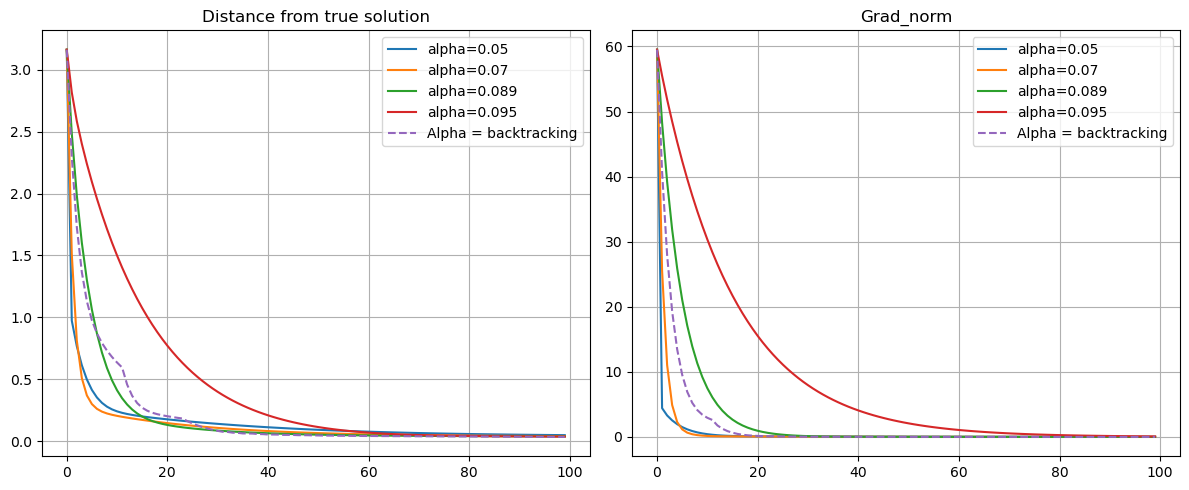

Condition number of Vandermonde matrix with n=15 : 403235365234.79


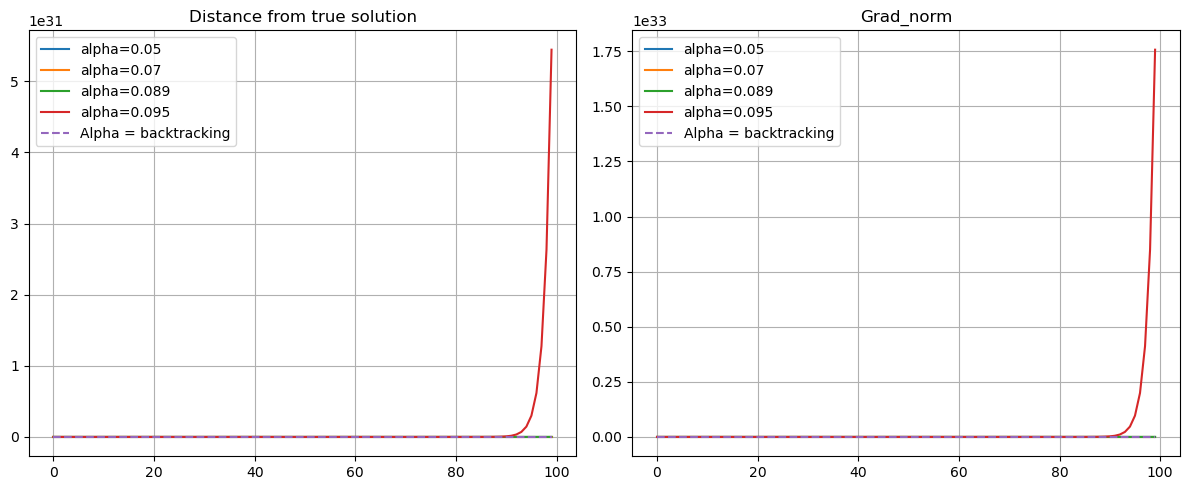

In [ ]:
######################################### FUNCTION 3 ##########################################

n_values = [5,10,15]
for n in n_values:
    v = np.linspace(0,1,n)
    A = np.vander(v)
    print(f"Condition number of Vandermonde matrix with n={n} : {np.linalg.cond(A, p=2)}")
    x_true = np.ones((n,)).T
    b = A @ x_true

    def f(x):
        return (np.linalg.norm(A @ x - b,2) ** 2)/2

    def grad_f(x):
        M = A @ x - b
        return A.T @ M 

    x0 = np.zeros((n, ))
    #alpha = [0.01,0.05,0.1,0.2]
    alpha = [0.05, 0.07, 0.089, 0.095]



    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
 

    x_back, k_back, diff_back, grad_norm_back, alphavalues = GD(f, grad_f, x0, alpha, backtrack=True, x_true = np.ones((1,n)))

    axes[0].set_title("Distance from true solution")
    for i in alpha:
        x_sol, k, diff, grad_norm, alphavalues = GD(f, grad_f, x0, alpha=i, backtrack=False, x_true = np.ones((1,n)))
        axes[0].plot(diff, label=f"alpha={i}")

    axes[0].plot(diff_back, label = "Alpha = backtracking", linestyle = "--")
    axes[0].grid()
    axes[0].legend()


    axes[1].set_title("Grad_norm")
    for i in alpha:
        x_sol, k, diff, grad_norm, alphavalues = GD(f, grad_f, x0, alpha=i, backtrack=False, x_true = np.ones((1,n)))
        axes[1].plot(grad_norm, label=f"alpha={i}")

    axes[1].plot(grad_norm_back, label = "Alpha = backtracking", linestyle = "--")
    axes[1].grid()
    axes[1].legend()


    plt.tight_layout()
    plt.show()


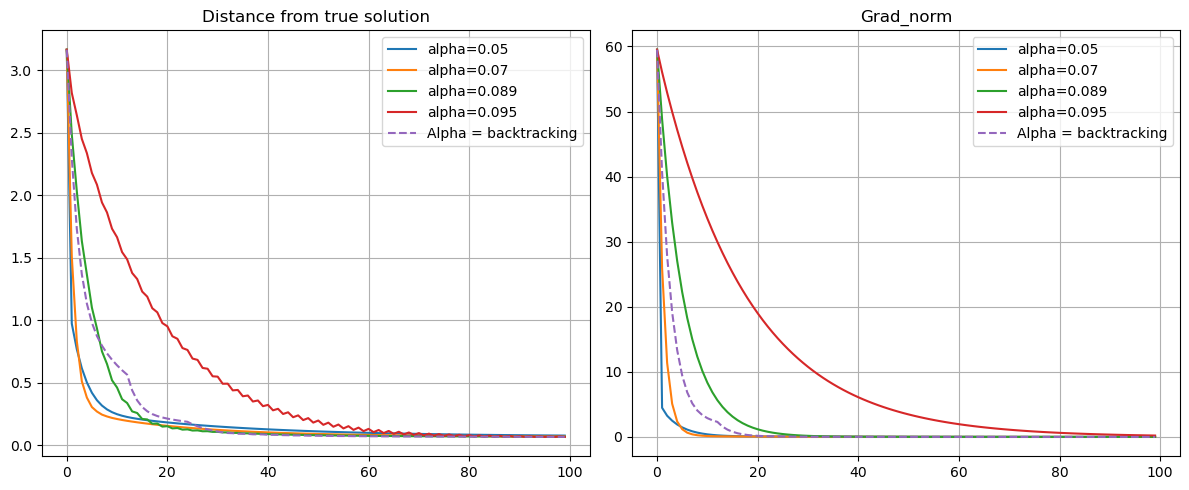

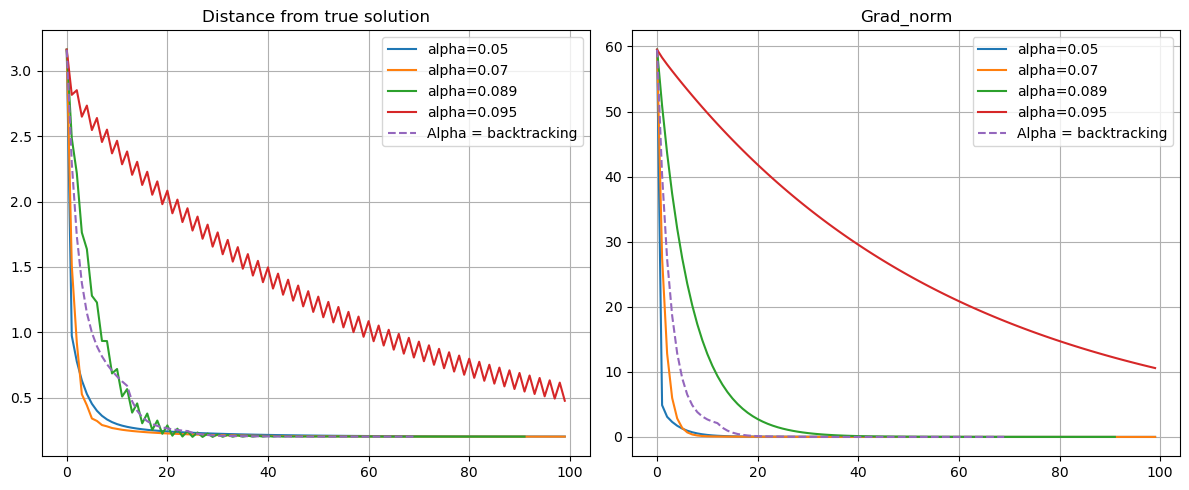

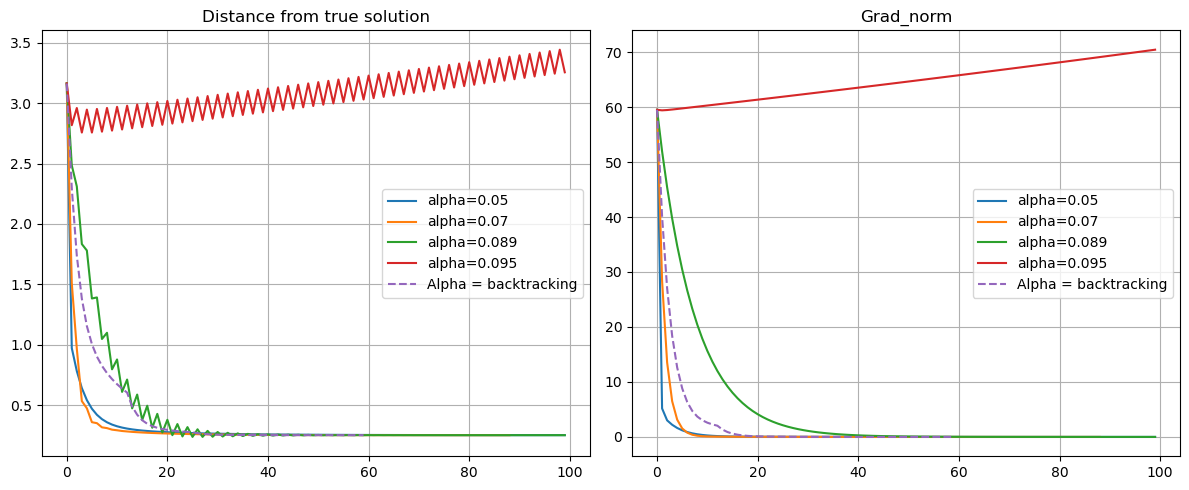

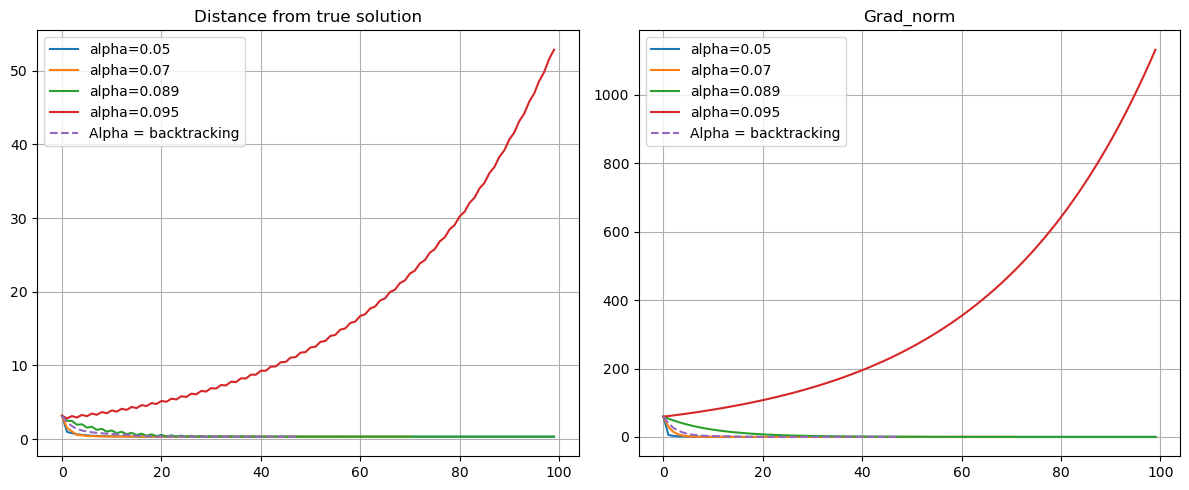

In [18]:
######################################### FUNCTION 4 ##########################################


lambda_values = [0.1, 0.5, 0.7, 1]
for lam in lambda_values:
    n = 10
    v = np.linspace(0,1,n)
    A = np.vander(v)

    x_true = np.ones((n,)).T
    b = A @ x_true

    def f(x):
        fatt1 = (np.linalg.norm(A@x - b, 2)**2)/2
        fatt2 = (lam/2)* (np.linalg.norm(x,2)**2)
        return fatt1 + fatt2


    def grad_f(x):
        M = A @ x -b
        return A.T @ M + lam *x 

    x0 = np.zeros((n, ))
    alpha = [0.05, 0.07, 0.089, 0.095]
    #alpha = [0.01,0.05,0.1,0.2]




    fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

    x_back, k_back, diff_back, grad_norm_back, alphavalues = GD(f, grad_f, x0, alpha, backtrack=True, x_true = np.ones((1,n)))

    axes[0].set_title("Distance from true solution")
    for i in alpha:
        x_sol, k, diff, grad_norm, alphavalues = GD(f, grad_f, x0, alpha=i, backtrack=False, x_true = np.ones((1,n)))

        axes[0].plot(diff, label=f"alpha={i}")

    axes[0].plot(diff_back, label = "Alpha = backtracking", linestyle = "--")
    axes[0].grid()
    axes[0].legend()


    axes[1].set_title("Grad_norm")
    for i in alpha:
        x_sol, k, diff, grad_norm, alphavalues = GD(f, grad_f, x0, alpha=i, backtrack=False, x_true = np.ones((1,n)))
        axes[1].plot(grad_norm, label=f"alpha={i}")

    axes[1].plot(grad_norm_back, label = "Alpha = backtracking", linestyle = "--")
    axes[1].grid()
    axes[1].legend()


    plt.tight_layout()
    plt.show() 

        

In [6]:
######################################### FUNCTION 5 ##########################################

def f(x):
    return x**4 + x**3 - 2*x**2 - 2*x

def grad_f(x):
    return 4*x**3 + 3*x**2 - 4*x - 2


With backtracking:
computed solution: 0.9178680870987203
number of iterations 23
Alpha value = {0.25, 0.0625, 0.015625}
 
Without backtracking
number of iterations 57
computed solution: 0.9153244731444921
number of iterations 12
computed solution: 0.9216327878691014
number of iterations 6
computed solution: 0.922277786172406
number of iterations 99
computed solution: 1.0926030185993145


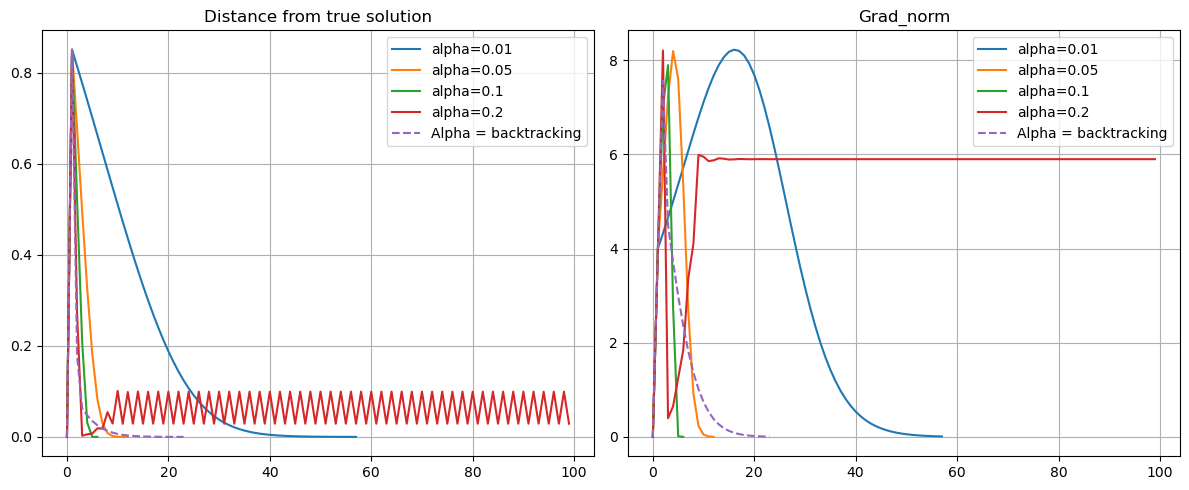

In [9]:
x0 = 0
alpha = [0.01,0.05,0.1,0.2]
#alpha = [0.05, 0.07, 0.089, 0.095]

#x_true found with WolframAlpha


fig, axes = plt.subplots(1, 2, figsize=(12, 5)) 

x_back, k_back, diff_back, grad_norm_back, alphavalues = GD(f, grad_f, x0, alpha, backtrack=True, x_true = 0.9222247929324218857020815)
print("With backtracking:")
print(f"computed solution: {x_back}")
print(f"number of iterations {k_back}")
print(f"Alpha value = {set(alphavalues)}")

print(" ")

print("Without backtracking")
axes[0].set_title("Distance from true solution")
for i in alpha:
    x_sol, k, diff, grad_norm, alphavalues = GD(f, grad_f, x0, alpha=i, backtrack=False, x_true = 0.9222247929324218857020815)
    print(f"number of iterations {k}")
    print(f"computed solution: {x_sol}")
    axes[0].plot(diff, label=f"alpha={i}")

axes[0].plot(diff_back, label = "Alpha = backtracking", linestyle = "--")
axes[0].grid()
axes[0].legend()


axes[1].set_title("Grad_norm")
for i in alpha:
    x_sol, k, diff, grad_norm, alphavalues = GD(f, grad_f, x0, alpha=i, backtrack=False, x_true = 0.9222247929324218857020815)
    axes[1].plot(grad_norm, label=f"alpha={i}")

axes[1].plot(grad_norm_back, label = "Alpha = backtracking", linestyle = "--")
axes[1].grid()
axes[1].legend()


plt.tight_layout()
plt.show()
#x_true = np.ones((1,n)))

In [148]:
#Just to create the function plot
y = []
for el in np.arange(-3,3,0.01):
    y.append(f(el))

 
Solution computed starting from x0 = 0
With alpha = 0.01: 0.9153244731444921
With alpha = 0.05: 0.9216327878691014
With alpha = 0.1: 0.922277786172406
With alpha = 0.2: 1.0926030185993145
 
Solution computed starting from x0 = 0.5
With alpha = 0.01: 0.9148067074727126
With alpha = 0.05: 0.9216477832792318
With alpha = 0.1: 0.9221183568199144
With alpha = 0.2: 0.6069533290162585
 
Solution computed starting from x0 = 1
With alpha = 0.01: 0.9288311251359469
With alpha = 0.05: 0.9225331112302771
With alpha = 0.1: 0.9223228692889355
With alpha = 0.2: 1.0926030185993145
 
Solution computed starting from x0 = 1.5
With alpha = 0.01: 0.9295493203415949
With alpha = 0.05: 0.9217636458539868
With alpha = 0.1: 0.9223182318168072
With alpha = 0.2: -1.2321417411778286


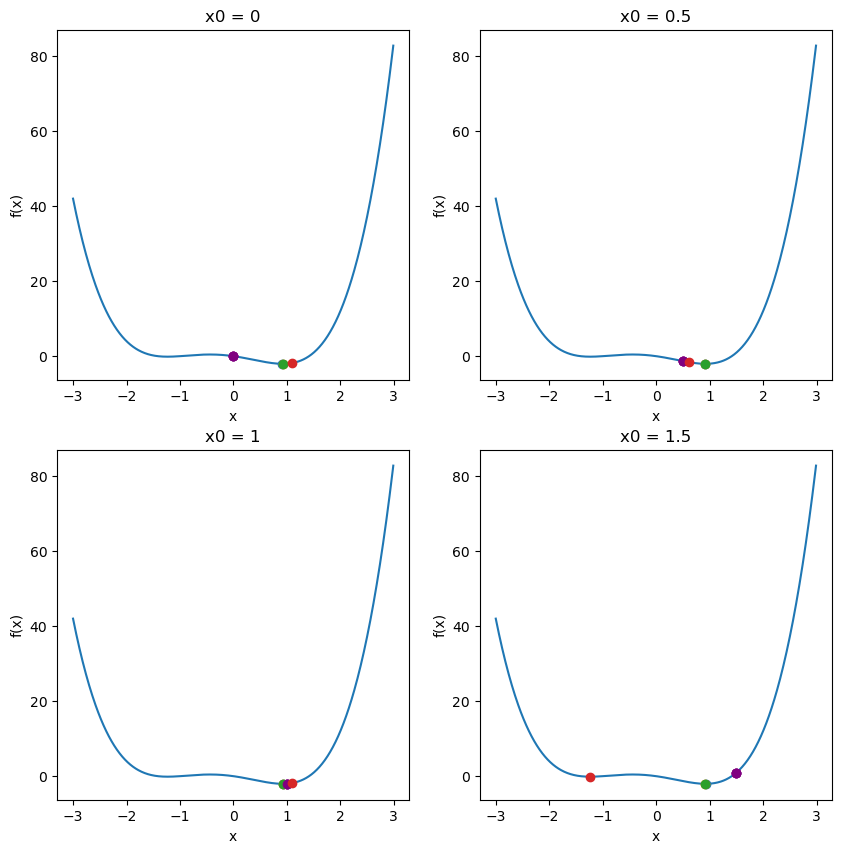

In [149]:
x0 = [0,0.5,1,1.5]

plt.figure(figsize=(10,10))

ind = 1
for el in x0:
    plt.subplot(2,2,ind)
    alpha = [0.01,0.05,0.1,0.2]
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.plot(np.arange(-3,3,0.01), y)
    plt.title(f"x0 = {el}")
    ind +=1
    print(" ")
    print(f"Solution computed starting from x0 = {el}")
    for i in alpha: 
        x_sol, k, diff, grad_norm, alphavalues = GD(f, grad_f, x0=el, alpha=i, backtrack=False, x_true = np.ones((1,n)))
        print(f"With alpha = {i}: {x_sol}")
        plt.scatter(el, f(el), label = f"Starting x0 : {el}", color = "purple", zorder = 5 )
        plt.scatter(x_sol, f(x_sol), label = f"x_sol = {x_sol}",  zorder = 5)

plt.show()

In [4]:
#Gradien Descent function for contour plot
def GD(f, grad_f, x0, alpha, x_true, kmax = 100, tolf= 1e-6, tolx= 1e-6, backtrack = False):
    if type(x0) != int and type(x0) != float:
        grad_norm = np.zeros((kmax+1, ))
        grad_norm[0] = np.linalg.norm(grad_f(x0))
        diff = np.zeros((kmax+1,))
        diff[0] = np.linalg.norm(x_true-x0,2)
    else:
        grad_norm = [0]
        grad_norm.append(grad_f(x0)**2)
        diff = [0]
        diff.append((x_true-x0)**2)
    
    x_values = [] #change just this
    alphavalues = []
    for k in range(kmax):
        if backtrack == True:
            alpha = backtracking(f, grad_f, x0)
            alphavalues.append(alpha)
        x = x0 - alpha * grad_f(x0)
        
        if type(x0) != int and type(x0) != float:
            grad_norm[k+1] = np.linalg.norm(grad_f(x))
        else:
            grad_norm.append(grad_f(x)**2)
        
        if type(x0) != int and type(x0) != float:
            if np.linalg.norm(grad_f(x)) <= tolf * grad_norm[0] or np.linalg.norm(x-x0)<= tolx:
                break
        else:
            if grad_f(x)**2 <= tolf * grad_norm[0] or (x-x0)**2<= tolx:
                break
        x_values.append(x) #change just this
        x0 = x
        if type(x0) != int and type(x0) != float:
            diff[k+1] = np.linalg.norm(x_true-x0,2)
        else:
            diff.append((x_true-x0)**2)
    #cut off the exceeding values
    diff = diff[:k+1]
    grad_norm = grad_norm[:k+1]
    
    return x_values, k, diff, grad_norm, alphavalues


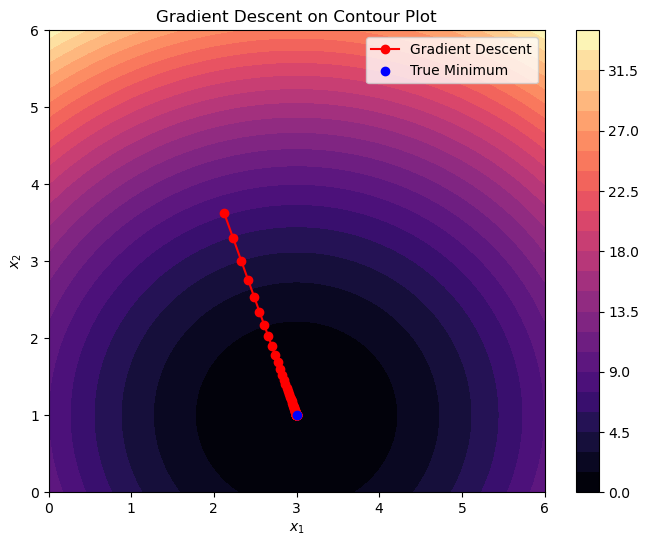

In [27]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return (x1-3)**2 + (x2 -1)**2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([2*(x1-3), 2*(x2-1)])

x0 = np.array([2,4])
alpha = 0.05 
x_true = np.array([[3],[1]])

x1 = np.linspace(0, 6, 100)  # Range x1
x2 = np.linspace(0, 6, 100)  # Range x2
X1, X2 = np.meshgrid(x1, x2)
Z = f([X1, X2])  

x_computed, k, diff, grad_norm, alphavalues = GD(f, grad_f, x0, alpha, backtrack=True, x_true = x_true)
x_steps = np.array(x_computed)

plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, levels=30, cmap="magma")
plt.colorbar()
plt.plot(x_steps[:, 0], x_steps[:, 1], 'ro-', label="Gradient Descent")
plt.scatter(3, 1, color='blue', label='True Minimum', zorder = 6) 
plt.title("Gradient Descent on Contour Plot")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()

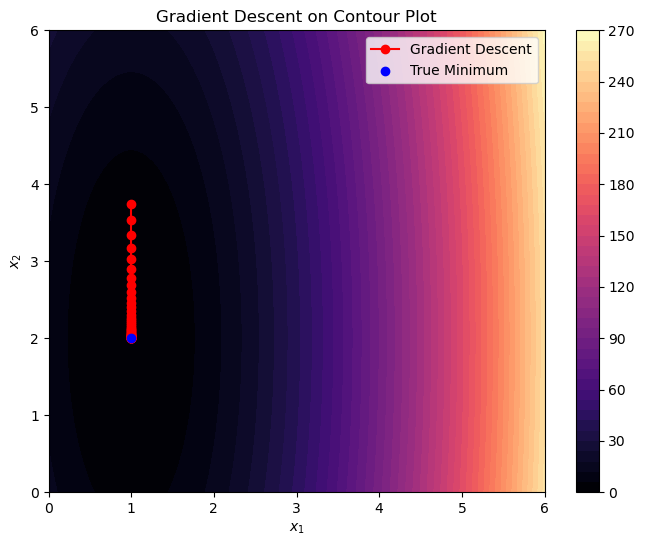

In [28]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return 10*(x1-1)**2 + (x2-2)**2

def grad_f(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([20*(x1-1), 2*(x2-2)])

x0 = np.array([1,4])
alpha = 0.05
x_true = np.array([[1],[2]])

x1 = np.linspace(0, 6, 100)  # Range x1
x2 = np.linspace(0, 6, 100)  # Range x2
X1, X2 = np.meshgrid(x1, x2)
Z = f([X1, X2]) 

x_computed, k, diff, grad_norm, alphavalues = GD(f, grad_f, x0, alpha, backtrack=True, x_true = x_true)
x_steps = np.array(x_computed)


plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, levels=50, cmap="magma")
plt.colorbar()
plt.plot(x_steps[:, 0], x_steps[:, 1], 'ro-', label="Gradient Descent")
plt.scatter(1, 2, color='blue', label='True Minimum',zorder = 6)
plt.title("Gradient Descent on Contour Plot")
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.legend()
plt.show()